# <a  name = ""><font color = "brown"> Title 1</font></a>

## <a  name = ""><font color = "green"> Title 3 </font></a>

### <font color = "purple"> Title 2 </font>

#### <font color = "orange"> Title 4 </font>

##### <font color = "darkcyan"> Titltle 5 </font>

> **NOTE:** <font color = 'orange'> This is how we do it!</font>

<a href = #bottom  style = "text-decoration:none"> go to bottom</a></br>
<a name = "top"></a>

# <font color = "brown"> Content </font>

<a href = #a0  style = "text-decoration:none"> Modelling steps</a></br>

<a href = #m1  style = "text-decoration:none">  Modelling</a>

<a href = #a1  style = "text-decoration:none">  Generate classification dataset from sklearn</a>

<a href = #a2  style = "text-decoration:none">  data visialisation function</a>

<a href = #a3  style = "text-decoration:none"> visualising loss curves</a>

<a href = #a4  style = "text-decoration:none"> Findiing the best learning rate</a>

<a href = #a5  style = "text-decoration:none"> Evaluation</a>

<a href = #a6  style = "text-decoration:none"> plot confusion matrix fuction</a>

<a href = #a7  style = "text-decoration:none"> Multiclass classification </a>

<a href = #a8  style = "text-decoration:none"> visialise fushion data function </a>

# <a  name = "a0"><font color = "brown"> Modelling steps </font></a>

### <font color = "green"> 1. Create or import a model </font>

### <font color = "green"> 2. Compile the model  </font>

### <font color = "green"> 3. Compile the model  </font>

### <font color = "green"> 4. Tweak the model  </font>

### <font color = "green"> 5. Evaluate the model  </font>

### <font color = "green"> 6. Alternate between step 5 and 6 to get the best results  </font>

# <a  name = "a1"><font color = "brown"> Generate classification dataset from sklearn</font></a>

In [88]:
from sklearn.datasets import make_circles
n_samples = 1000 #number of samples 
#creating the circles 
x, y = make_circles(
    n_samples=n_samples,
    shuffle=True,
    noise=0.03,
    random_state=42
)

In [89]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [90]:
y[:50]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1], dtype=int64)

### <font color = "green"> Visualize the dataset </font>

In [91]:
import pandas as pd

In [92]:
circles_df = pd.DataFrame(data = {'x0': x[:,0], 'x1': x[:,1], 'y':y})
circles_df

,x0,x1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


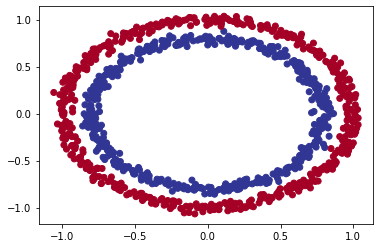

In [93]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c =y , cmap = plt.cm.RdYlBu)

# <a  name = "m1"><font color = "brown"> Modelling</font></a>

In [94]:
import tensorflow as tf
tf.__version__

'2.3.0'

## <font color = "purple"> model_1a </font>

In [95]:
tf.random.set_seed(42)
# create a one layer model with the sequencial API
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
    ]) 
# compile the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])
# fitting the model
model_1.fit(x,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 919us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 968us/step - loss: 0.6942 - accuracy: 0.4820


### <font color = "green"> try more epochs</font>

In [96]:
model_1.fit(x,y, epochs = 200, verbose = 0) #verbose determines how the training will be shown(0,1 0r 2)
model_1.evaluate(x,y) # train set accuracy 

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

## <font color = "purple"> model_1b </font>

### <font color = "green"> try more layers</font>

In [108]:
#Creat/define
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#compile

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])
#fit
model_2.fit(x,y, epochs = 200, verbose = 0)

In [109]:
model_2.evaluate(x,y) # train set accuracy 

32/32 [==============================] - 0s 864us/step - loss: 0.6938 - accuracy: 0.5000


[0.6938000917434692, 0.5]

> **Observe:** The model seems to be doing a 50% guess work

### <a  name = "a2"> <font color = "green"> Visualistion function</font> </a>

In [110]:
import numpy as np

In [111]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [112]:
a,b = np.meshgrid([1,2,3,4], [5,6,7,8])
a

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [113]:
b

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [114]:
a.ravel()

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [117]:
b.ravel()

array([5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8])

In [118]:
cc = np.c_[a.ravel(),b.ravel()]
cc

array([[1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [1, 6],
       [2, 6],
       [3, 6],
       [4, 6],
       [1, 7],
       [2, 7],
       [3, 7],
       [4, 7],
       [1, 8],
       [2, 8],
       [3, 8],
       [4, 8]])

## <font color = "purple"> model_1c(worked best) </font>

In [119]:
tf.random.set_seed(42)
#define
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#compile
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr =0.001),
    metrics = ["accuracy"])

history = model_3.fit(x,y,epochs=100, verbose =0)

In [120]:
model_3.evaluate(x,y) # train set accuracy 

32/32 [==============================] - 0s 971us/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

doing binary classifcation...


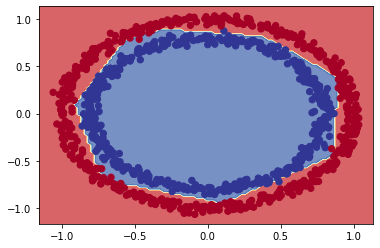

In [121]:
plot_decision_boundary(model_3,x,y)

> **NOTE: <font color = 'orange'>Introduction of none linearity though none linear actinvations drastically improve the model accuracy </font>**

## <font color = "purple"> model_1d(proper approach) </font>
- splitting the data into test and train set

In [122]:
y.shape

(1000,)

In [123]:
x_train, y_train = x[:800], y[:800] #80%
x_test, y_test = x[800:], y[800:]#20%

In [124]:
tf.random.set_seed(42)
#define
model_1d = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
#compile
model_1d.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr = 0.01),
    metrics = ['accuracy']
)

#fit
m1d_history = model_1d.fit(x_train, y_train, epochs=100, verbose=1)#keep history to plot training loss

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9937
Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9850
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9850
Epoch 85/100
25/25 [==============================] - 0s 840us/step - loss: 0.0442 - accuracy: 0.9862
Epoch 86/100
25/25 [==============================] - 0s 840us/step - loss: 0.0356 - accuracy: 0.9950
Epoch 87/100
25/25 [==============================] - 0s 800us/step - loss: 0.0390 - accuracy: 0.9887
Epoch 88/100
25/25 [==============================] - 0s 760us/step - loss: 0.0392 - accuracy: 0.9875
Epoch 89/100
25/25 [==============================] - 0s 736us/step - loss: 0.0431 - accuracy: 0.9900
Epoch 90/100
25/25 [==============================] - 0s 760us/step - loss: 0.0395 - accuracy: 0.9875
Epoch 91/100
25/25 [==============================] - 0s 720us/step - loss: 0.0404 - accuracy: 0.9862

In [125]:
#predict on test set
model_1d.fit(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9950


> **NOTE:** <font color = 'orange'>The learning rate was increased such that the model can learn faster with less epochs. This decision was made based on the history of the earlier models which showed learing but significant improvent after several epochs</font>

## <a  name = "a3"><font color = "green"> Visualising loss/training curves</font></a>
- use model history

Text(0.5, 1.0, 'model_1d training curves')

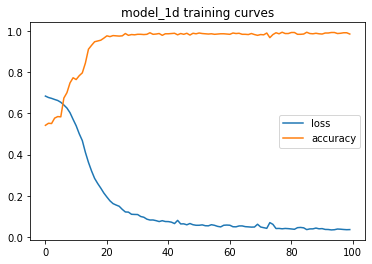

In [169]:
#dataframe the history
hdf = pd.DataFrame(m1d_history.history).plot()
plt.title("model_1d training curves")

> **Observation:** <font color = 'orange'> The loss is going down and the accuracy up. Great!!</font>

## <a  name = "a4"><font color = "green"> Finding the best learing rate </font></a>
- <font color = "purple"> Train the model with an exponetially increasing rate(use the callback argument if .fit) </font>
- <font color = "purple"> Use the history to plot a graph of the loss vs learning rate </font>
- <font color = "purple"> pick the learning rate where the loss decreses the most but not yet flattened </font>


## <font color = "purple"> model_m1e(trained to determine an appropriate learning rate) </font>

In [181]:
#training the model with an exponetially increasing rate
#Define
m1e = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])
#Compile
m1e.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

#creating the learning rate schedular
lr_shd = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#fitting the model with the lr_shd
m1e_hist = m1e.fit(x_train,y_train, 
                   epochs= 100, 
                   verbose= 2,
                   callbacks=[lr_shd])

Epoch 1/100
25/25 - 0s - loss: 0.7105 - accuracy: 0.4850
Epoch 2/100
25/25 - 0s - loss: 0.7101 - accuracy: 0.4812
Epoch 3/100
25/25 - 0s - loss: 0.7097 - accuracy: 0.4812
Epoch 4/100
25/25 - 0s - loss: 0.7092 - accuracy: 0.4800
Epoch 5/100
25/25 - 0s - loss: 0.7087 - accuracy: 0.4787
Epoch 6/100
25/25 - 0s - loss: 0.7082 - accuracy: 0.4800
Epoch 7/100
25/25 - 0s - loss: 0.7076 - accuracy: 0.4825
Epoch 8/100
25/25 - 0s - loss: 0.7070 - accuracy: 0.4837
Epoch 9/100
25/25 - 0s - loss: 0.7064 - accuracy: 0.4837
Epoch 10/100
25/25 - 0s - loss: 0.7057 - accuracy: 0.4837
Epoch 11/100
25/25 - 0s - loss: 0.7051 - accuracy: 0.4775
Epoch 12/100
25/25 - 0s - loss: 0.7042 - accuracy: 0.4825
Epoch 13/100
25/25 - 0s - loss: 0.7035 - accuracy: 0.4825
Epoch 14/100
25/25 - 0s - loss: 0.7027 - accuracy: 0.4825
Epoch 15/100
25/25 - 0s - loss: 0.7019 - accuracy: 0.4837
Epoch 16/100
25/25 - 0s - loss: 0.7009 - accuracy: 0.4850
Epoch 17/100
25/25 - 0s - loss: 0.7000 - accuracy: 0.4837
Epoch 18/100
25/25 - 0s

Text(0.5, 1.0, 'Loss vs learning_rate graph')

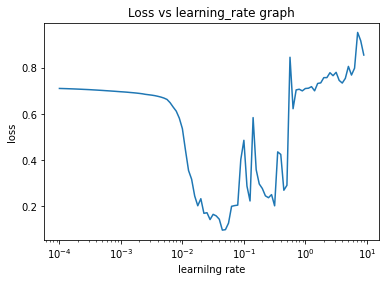

In [182]:
# plotting the loss vs learing rate
# define the x-axis values to be in the range of the used exponetial learing rate
x_lr_rate = 1e-4 * (10 ** (np.arange(100)/20))
y_loss = m1e_hist.history['loss']

#plt.figure(figsize=(12, 6))
plt.semilogx(x_lr_rate, y_loss) #semilogx puts the a-axis on a lograthminc scale(proper spread)
plt.xlabel("learnilng rate")
plt.ylabel("loss")
plt.title("Loss vs learning_rate graph")


> **NOTE:** <font color = 'orange'> To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve)</font>

> **Observation:** <font color = 'orange'> From the above graph 1e-2 is a good start</font>

In [183]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

## <font color = "purple"> model_m1f </font>
- training with the observed learing rate

In [187]:
tf.random.set_seed(42)
#training the model with an exponetially increasing rate
#Define
m1f = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])
#Compile
m1f.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer= tf.keras.optimizers.Adam(lr = 0.02),
    metrics = ['accuracy']
)

#fitting the model with the lr_shd
m1f_hist = m1f.fit(x_train,y_train, 
                   epochs= 25, 
                   verbose= 2)

Epoch 1/25
25/25 - 0s - loss: 0.6837 - accuracy: 0.5600
Epoch 2/25
25/25 - 0s - loss: 0.6744 - accuracy: 0.5750
Epoch 3/25
25/25 - 0s - loss: 0.6626 - accuracy: 0.5875
Epoch 4/25
25/25 - 0s - loss: 0.6332 - accuracy: 0.6388
Epoch 5/25
25/25 - 0s - loss: 0.5830 - accuracy: 0.7563
Epoch 6/25
25/25 - 0s - loss: 0.4907 - accuracy: 0.8313
Epoch 7/25
25/25 - 0s - loss: 0.4251 - accuracy: 0.8450
Epoch 8/25
25/25 - 0s - loss: 0.3596 - accuracy: 0.8875
Epoch 9/25
25/25 - 0s - loss: 0.3152 - accuracy: 0.9100
Epoch 10/25
25/25 - 0s - loss: 0.2512 - accuracy: 0.9500
Epoch 11/25
25/25 - 0s - loss: 0.2152 - accuracy: 0.9500
Epoch 12/25
25/25 - 0s - loss: 0.1721 - accuracy: 0.9750
Epoch 13/25
25/25 - 0s - loss: 0.1443 - accuracy: 0.9837
Epoch 14/25
25/25 - 0s - loss: 0.1232 - accuracy: 0.9862
Epoch 15/25
25/25 - 0s - loss: 0.1085 - accuracy: 0.9850
Epoch 16/25
25/25 - 0s - loss: 0.0940 - accuracy: 0.9937
Epoch 17/25
25/25 - 0s - loss: 0.0827 - accuracy: 0.9962
Epoch 18/25
25/25 - 0s - loss: 0.0798 - 

In [188]:
#testing the model on the test dataset 
m1f.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9900


[0.046286068856716156, 0.9900000095367432]

doing binary classifcation...
doing binary classifcation...


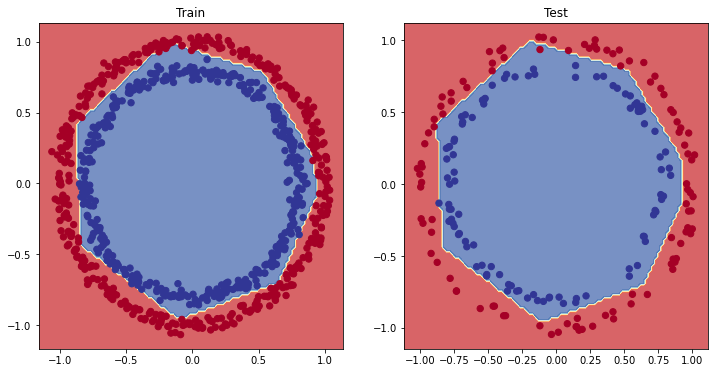

In [189]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(m1f, X=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(m1f, X=x_test, y=y_test)
plt.show()

> **Observation:** <font color = 'orange'> With the deduced learning rate, the model is able to reach high accuracies with as low as 20 epochs</font>

In [ ]:
- use of softmax in output
- plott the 
- flattenig the inport layers
- model without one hot encoded classes
- one with
- introducing normalisation

> **Observation:** <font color = 'orange'> When comparing differnt models, change one thing and keep the rest constant so as to be able to deduce the cause in the change of resuslts</font>

## <a  name = "a5"><font color = "green"> Evaluation </font></a>
- `tf.evaluate(test_features, test_lables)`  which uses the set metrics(already used)
- `confusion_matrix(y_test, y_predicted)` `from sklearn.metrics import confusion_matrix`
- include the validation set on the fly by using the `validation_data=(test_data, test_labels)` attribute of the train/fit method; use 


In [263]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = tf.round(m1f.predict(x_test)) # use tf.round to convert the probabilities to zeros and ones

> **NOTE:** <font color = 'orange'> `model.predict(x_text)` outputs probabilities; first converting them to the format of the given output is reqiured</font>

### <font color = "purple"> precision and recall </font>

In [264]:
precision_score(y_true = y_test, y_pred = y_pred )

0.98989898989899

In [265]:
recall_score(y_true = y_test, y_pred = y_pred )

0.98989898989899

### <font color = "purple"> f1_score </font>

In [266]:
f1_score(y_true = y_test,y_pred = y_pred )

0.98989898989899

### <font color = "purple"> confution matrix function </font>

In [258]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, #true labels
                 y_pred = y_pred ) #predicted values

array([[100,   1],
       [  1,  98]], dtype=int64)

### <a  name = "a6"><font color = "purple"> Plot_ confution matrix function </font></a>

In [259]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

# Our function needs a different name to sklearn's plot_confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  import itertools
  from sklearn.metrics import confusion_matrix

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

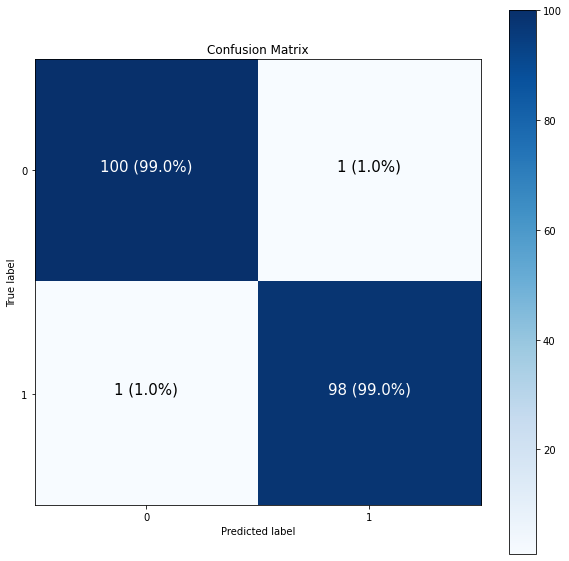

In [260]:
plot_confusion_matrix(y_test, y_pred, classes=None, figsize=(10, 10), text_size=15)

## <a  name = "a7"><font color = "green"> Multiclass classification </font></a>

In [267]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [273]:
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion)  = fashion_mnist.load_data()

4423680/4422102 [==============================] - 21s 5us/step


### <font color = "purple">Visualising the data </font>

In [277]:
x_train_fashion.shape

(60000, 28, 28)

In [280]:
y_train_fashion.shape

(60000,)

In [306]:
classes, indx = tf.unique(y_train_fashion)
classes.numpy()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

- class description

In [309]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5, 1.0, 'Ankle boot')

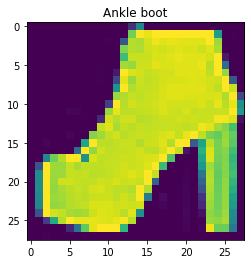

In [312]:
item_no = 44
plt.imshow(x_train_fashion[item_no])
plt.title(class_names[y_train_fashion[item_no]])

#### <a  name = ""><font color = "orange">  fushion visaulistion function</font></a>

In [324]:
# Plot multiple random images of fashion MNIST
def visialise_fushion():
    import random
    plt.figure(figsize=(12, 10))
    for i in range(16):
      ax = plt.subplot(5, 4, i + 1)
      rand_index = random.choice(range(len(x_train_fashion)))
      plt.imshow(x_train_fashion[rand_index], cmap=plt.cm.binary)
      plt.title(class_names[y_train_fashion[rand_index]])
      plt.axis(False)

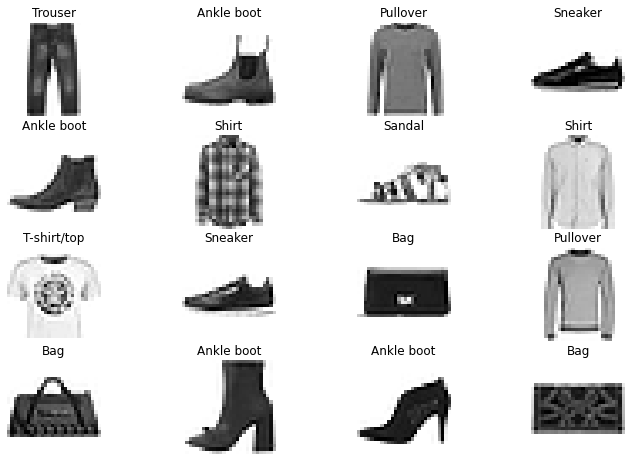

In [325]:
visialise_fushion()

### <font color = "purple"> model mf1 </font>

In [330]:
#define
mf1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # flattens the image 
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

mf1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = "Adam",
    metrics = ["accuracy"]
)

mf1.fit(x_train_fashion, y_train_fashion, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 2s 941us/step - loss: 2.3363 - accuracy: 0.1228
Epoch 2/50
1875/1875 [==============================] - 2s 939us/step - loss: 2.0939 - accuracy: 0.1748
Epoch 3/50
1875/1875 [==============================] - ETA: 0s - loss: 1.7928 - accuracy: 0.22 - 2s 1ms/step - loss: 1.7923 - accuracy: 0.2220
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7296 - accuracy: 0.2355
Epoch 5/50
1875/1875 [==============================] - 2s 973us/step - loss: 1.6806 - accuracy: 0.2677
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6429 - accuracy: 0.2865
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6212 - accuracy: 0.2973
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6129 - accuracy: 0.2946
Epoch 9/50
1875/1875 [==============================] - 2s 953us/step - loss: 1.6053 - accuracy: 0.2973
Epoch 10/50
1875/1875 [=========

### <font color = "purple"> model mf2 (find a good learining rate) </font>

In [334]:
#define
mf2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # flattens the image 
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

#compile
mf2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = "Adam",
    metrics = ["accuracy"]
)
#learing rate schedular
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#train
mf2_hist = mf2.fit(x_train_fashion,
                   y_train_fashion,
                   epochs = 30,
                   validation_data= (x_test_fashion, y_test_fashion),
                   callbacks= [lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3304 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3029 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy:

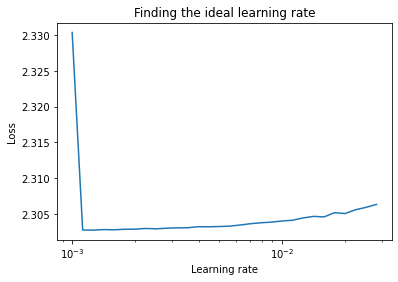

In [336]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(30)/20))
plt.semilogx(lrs, mf2_hist.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

- 0.001 seems to be a good choice

In [337]:
1e-3

0.001

### <font color = "purple"> model mf3 (with the selected learning rate) </font>

In [340]:
#define
mf3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # flattens the image 
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

#compile
mf3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ["accuracy"]
)

#train
mf3_hist = mf3.fit(x_train_fashion,
                   y_train_fashion,
                   epochs = 50,
                   validation_data = (x_test_fashion, y_test_fashion))

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.4827 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

**NOTE** <font color = 'orange'> The model is learning but an extremly slow rate</font>
- lets try normalising the data (nural nets love this)

### <font color = "purple"> model mf4 (training with normalised data) </font>

- Normalising the data

In [342]:
x_test_fashion.max()

255

In [343]:
x_test_fashion.min()

0

In [346]:
#generating the normalised data
x_train_fashion_norm = x_train_fashion/255
x_test_fashion_norm = x_test_fashion/255

In [348]:
#define
mf4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # flattens the image 
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

#compile
mf4.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ["accuracy"]
)

#train
mf4_hist = mf4.fit(x_train_fashion_norm,
                   y_train_fashion,
                   epochs = 70,
                   validation_data = (x_test_fashion_norm, y_test_fashion))

Epoch 1/70
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1773 - accuracy: 0.5865 - val_loss: 0.8219 - val_accuracy: 0.7377
Epoch 2/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7144 - accuracy: 0.7627 - val_loss: 0.6826 - val_accuracy: 0.7713
Epoch 3/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6209 - accuracy: 0.7913 - val_loss: 0.6236 - val_accuracy: 0.7921
Epoch 4/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5762 - accuracy: 0.8024 - val_loss: 0.5972 - val_accuracy: 0.7963
Epoch 5/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5545 - accuracy: 0.8072 - val_loss: 0.5830 - val_accuracy: 0.7965
Epoch 6/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5405 - accuracy: 0.8112 - val_loss: 0.5748 - val_accuracy: 0.8039
Epoch 7/70
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5303 - accuracy: 0.8135 - val_loss: 0.5870 - val_accuracy:

1875/1875 [==============================] - 2s 910us/step - loss: 0.4558 - accuracy: 0.8378 - val_loss: 0.5277 - val_accuracy: 0.8180
Epoch 58/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4577 - accuracy: 0.8368 - val_loss: 0.5300 - val_accuracy: 0.8141
Epoch 59/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4568 - accuracy: 0.8382 - val_loss: 0.5413 - val_accuracy: 0.8128
Epoch 60/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4561 - accuracy: 0.8379 - val_loss: 0.5121 - val_accuracy: 0.8238
Epoch 61/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4547 - accuracy: 0.8395 - val_loss: 0.5299 - val_accuracy: 0.8160
Epoch 62/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4555 - accuracy: 0.8387 - val_loss: 0.5200 - val_accuracy: 0.8203
Epoch 63/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4561 - accuracy: 0.8385 - val_loss: 0.5206 - val_accuracy: 0.

### <font color = "purple"> plotting the confution matrix </font>

In [363]:
#pridict labels
mf4_pred = mf4.predict(x_test_fashion_norm)
ypred5.shape

(10000, 10)

In [364]:
ypred5[0] #check format

array([1.2960545e-10, 1.1340052e-12, 9.9129576e-12, 5.2271812e-08,
       6.7153227e-10, 2.6007129e-02, 1.6948806e-10, 1.1281268e-01,
       1.2999335e-05, 8.6116719e-01], dtype=float32)

In [367]:
#convert the probabilities to classes
mf4_pred = tf.argmax(ypred5, axis = 1)

In [370]:
mf4_pred[0].numpy()

9

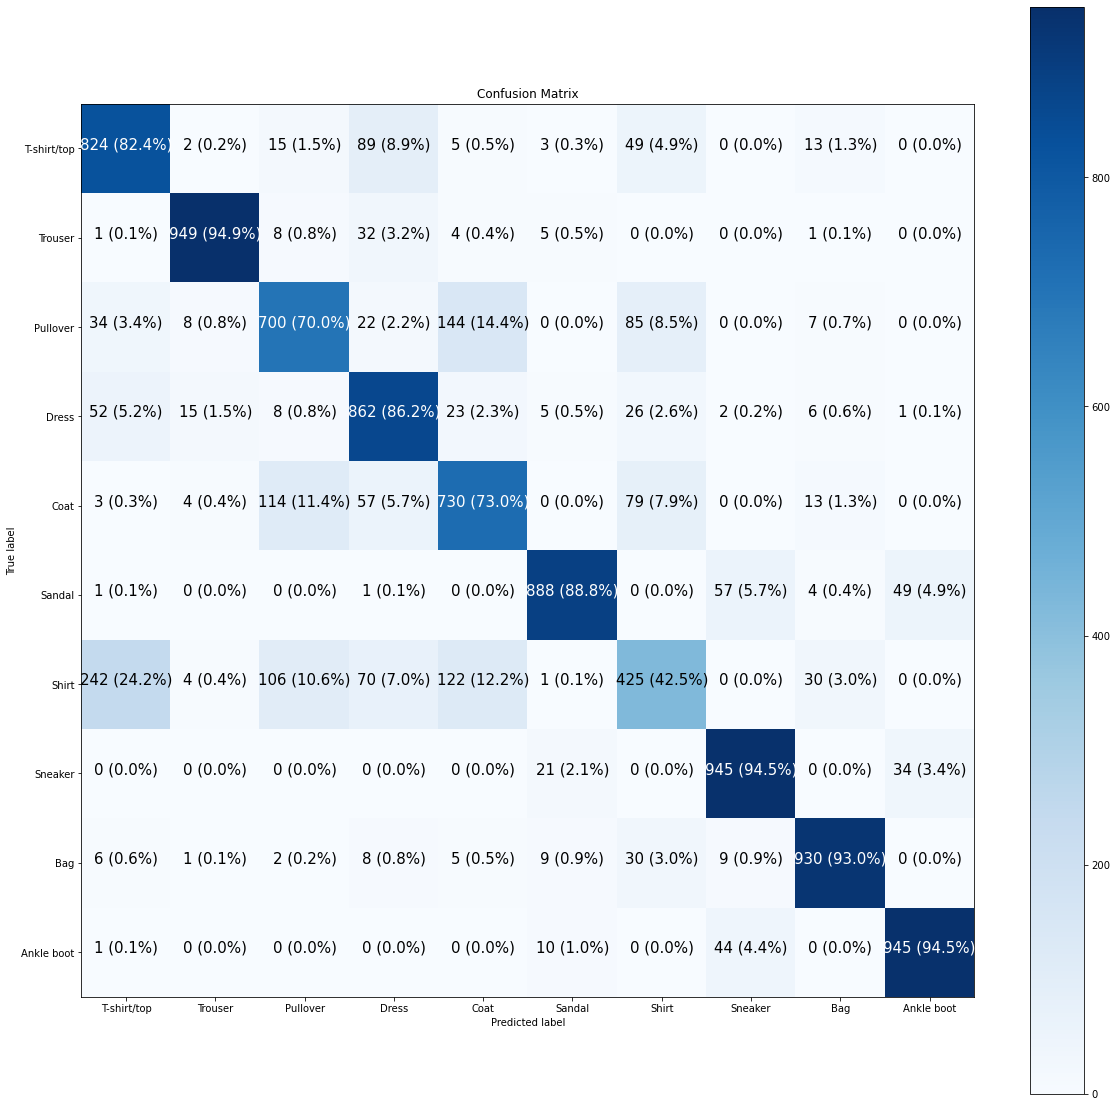

In [371]:
plot_confusion_matrix(y_test_fashion,mf4_pred, classes=class_names, figsize=(20, 20) )

**Observation** <font color = 'orange'> The model is to some extent confused between shirt and t-shirt; shirt and coat; pullover and coat, etc </font>
- think of ways to reduce on this confution e.g merge classes, get more data among others

<a href = #top  style = "text-decoration:none" > go to top</a></br>
<a name = "bottom"></a>